In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import gym
import pandas
import torch
import torch.nn as nn
import random
from collections import deque
from agents.DQN import DQN
from networks.base_network import StandardNN
import gym
from torch import nn
import torch
from typing import Union
import numpy as np
from environments.easy import easy_env

In [4]:
from matplotlib import pyplot as plt
def moving_average(x, window_length: Union[int, None] = None) -> np.array:
    if window_length is None:
        window_length = len(x) // 50
    return np.convolve(x, np.ones(window_length), "valid") / window_length


def plot_results(test_rewards):
    ma_rewards = moving_average(test_rewards)
    plt.plot(ma_rewards, label="rewards")
    plt.show()

In [5]:
env = gym.make('CartPole-v1', new_step_api=True)

try:
    n_obs = env.reset().size
except AttributeError:
    print('oh no, n_obs unknown')

n_actions = env.action_space.n  # Not sure how to programatically get this - some manual config will do


# agent = eg_model(network1, env.action_space.n)

In [8]:
env.reset()
env.step(env.action_space.sample())

(array([ 0.02053273,  0.19246739,  0.03439946, -0.3280915 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [6]:
network1 = StandardNN(n_obs, n_actions)

In [7]:
max_games = 1000
agent = DQN(network1, n_actions, env, max_games= max_games, min_epsilon=0.1, lr=0.1)
agent._play_games(max_games)

ValueError: too many values to unpack (expected 4)

In [7]:
agent.action_counts

{0: 31521, 1: 33332}

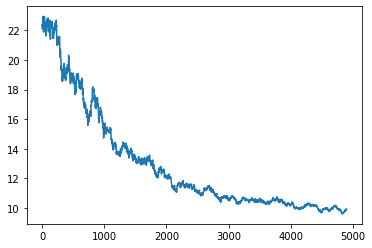

In [8]:
total_rewards = [i[-1] for i in agent.reward_averages]
plot_results(total_rewards)